#Import libraries

In [52]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier

#Load the saved model
import joblib



#Load Dataset: train-data

In [53]:
train = pd.read_csv('train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


#Data Preparing


In [55]:
#data type:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [56]:
# #To check if there are any missing values
train.isnull().sum()


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,5
four_g,5
int_memory,5
m_dep,5
mobile_wt,4
n_cores,4


#We can replace the missing values (white spaces) either by deleting these values since the number of rows to be removed is small, but I support replacing them with the mean.

In [58]:
from sklearn.impute import SimpleImputer

# Convert white spaces to NaN
train.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Columns from 4 to 16 where missing values will be replaced with the mean
columns_to_impute = train.columns[4:17]

# Create a SimpleImputer to replace missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply SimpleImputer to the selected columns
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])

# Display the number of missing values after processing (should be 0 if all are replaced)
print(train.isnull().sum())

print(train.shape)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
(2000, 21)


#*Plot Data*: The data is balanced








<ipython-input-57-6efef088f526>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=train['price_range'], palette="viridis")


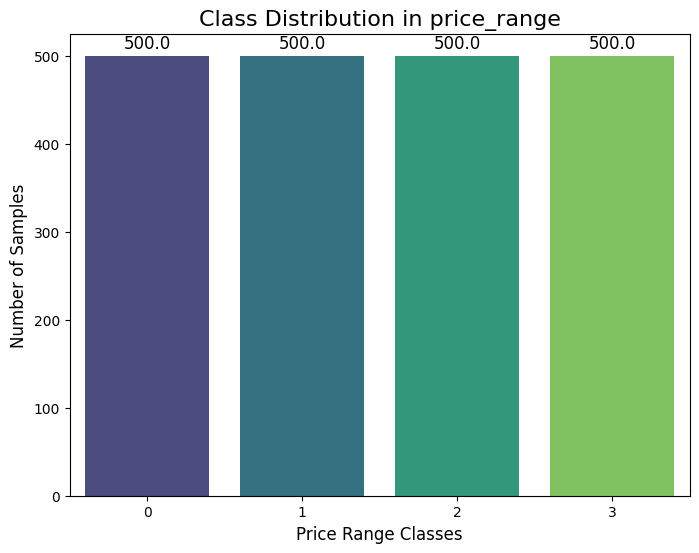

In [57]:

# Plot the distribution of the classes in 'price_range' with sample sizes
plt.figure(figsize=(8, 6))

# Create a bar plot showing the number of samples in each class
ax = sns.countplot(x=train['price_range'], palette="viridis")

# Add sample size annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels for the plot
plt.title('Class Distribution in price_range', fontsize=16)
plt.xlabel('Price Range Classes', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)

# Show the plot
plt.show()


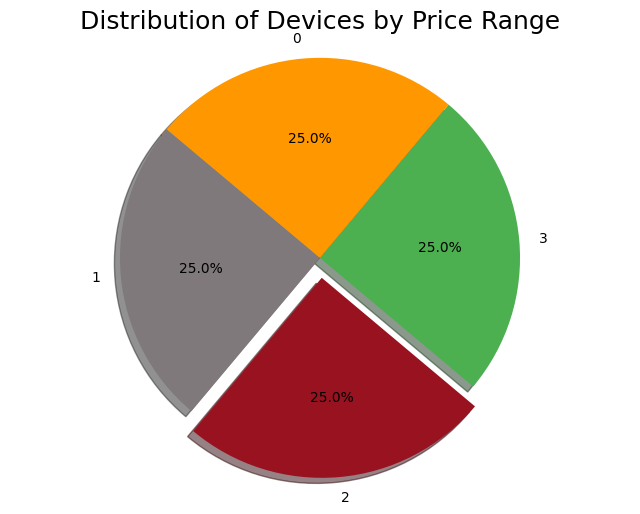

In [72]:
import matplotlib.pyplot as plt

# Figure size
plt.figure(figsize=(8,6))

# Customize colors and other settings
colors = ['#80797c', '#981220', '#4caf50', '#ff9800']  # Add more colors if needed for more classes

# Explode the first slice for better visualization
explode = (0, 0.1, 0, 0)  # Adjust this based on how many classes you have in 'price_range'

# Create a pie chart
plt.pie(
    x=train['price_range'].value_counts(),  # Use the value counts for 'price_range'
    labels=train['price_range'].value_counts().index,  # Use the unique values as labels
    explode=explode,  # Explosion effect
    colors=colors,  # Color settings
    autopct='%1.1f%%',  # Show percentages
    shadow=True,  # No shadow
    startangle=140  # Starting angle for the pie chart
)

# Title and axis settings
plt.title('Distribution of Devices by Price Range', fontsize=18)
plt.axis('equal')  # To ensure the pie chart is a circle

# Display the chart
plt.show()


#Load Dataset: test-data

In [61]:
test = pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [63]:
test.isnull().sum()

,0
id,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0


#Split Data and build the model

#The SVM and KNN algorithms are the most efficient and easiest to use for a multi-class classification problem like this, especially with this relatively small amount of data, as they tend to perform well in situations where the dataset size is limited, offering reliable accuracy without the need for extensive tuning.


--- SVM (Training Data) ---

Training Accuracy: 0.953125

Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       395
           1       0.93      0.95      0.94       409
           2       0.95      0.91      0.93       408
           3       0.97      0.97      0.97       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600


Training Confusion Matrix:
 [[388   7   0   0]
 [ 12 390   7   0]
 [  0  23 372  13]
 [  0   0  13 375]]

--- SVM (Validation Data) ---

Validation Accuracy: 0.965

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112



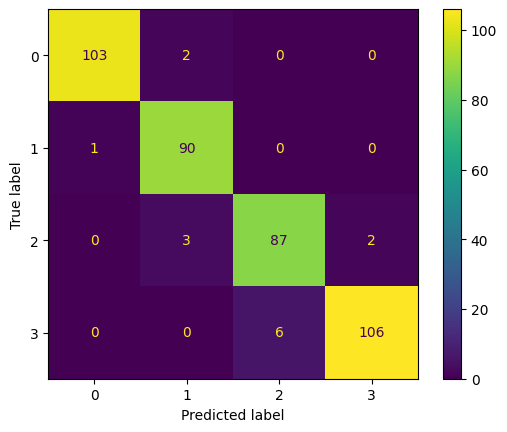


--- K-Nearest Neighbors (Training Data) ---

Training Accuracy: 0.955

Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       395
           1       0.92      0.97      0.94       409
           2       0.95      0.93      0.94       408
           3       0.98      0.96      0.97       388

    accuracy                           0.95      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.95      0.96      1600


Training Confusion Matrix:
 [[380  15   0   0]
 [  7 396   6   0]
 [  0  19 380   9]
 [  0   0  16 372]]

--- K-Nearest Neighbors (Validation Data) ---

Validation Accuracy: 0.945

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.93      0.93        91
           2       0.90      0.91      0.91        92
           3       0.97   

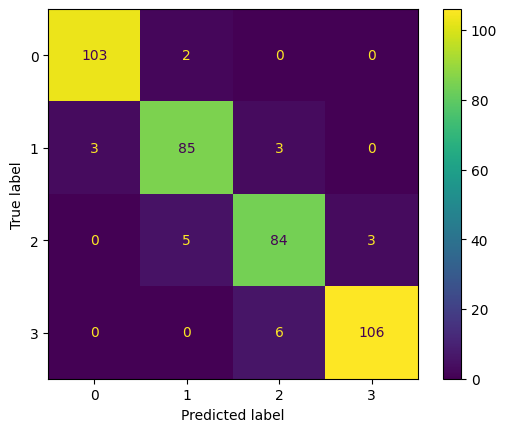


--- Random Forest (Training Data) ---

Training Accuracy: 0.990625

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       395
           1       0.98      1.00      0.99       409
           2       0.99      0.99      0.99       408
           3       0.99      0.99      0.99       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600


Training Confusion Matrix:
 [[392   3   0   0]
 [  1 407   1   0]
 [  0   4 402   2]
 [  0   0   4 384]]

--- Random Forest (Validation Data) ---

Validation Accuracy: 0.8725

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.86      0.80      0.83        91
           2       0.77      0.82      0.79        92
           3       0.92      0.89 

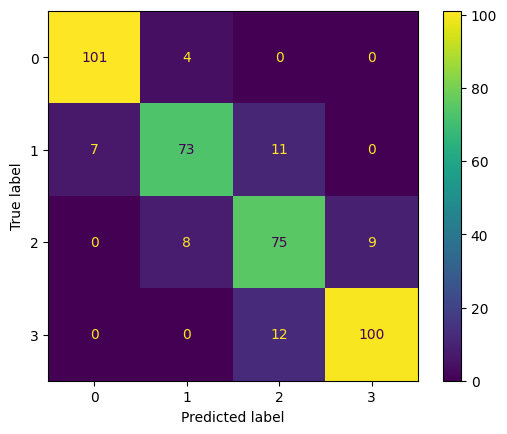

In [75]:
# x, y feature and target separation
X = train.drop(columns=['price_range'])  # Features: all columns except 'price_range'
y = train['price_range']  # Target: 'price_range'

# Splitting the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models to use (SVM, KNN, Random Forest)
models = {
    'SVM': SVC(kernel='rbf', C=1, gamma='scale'),  # Support Vector Machine with RBF kernel
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),  # KNN with 5 neighbors
    'Random Forest': RandomForestClassifier(
        n_estimators=100,  # Number of trees in the forest
        max_depth=15,  # Maximum depth of each tree
        min_samples_split=10,  # Minimum samples required to split an internal node
        min_samples_leaf=4,  # Minimum samples required to be at a leaf node
        random_state=42  # Random state for reproducibility
    )
    # 'Naive Bayes': GaussianNB(),  # Uncomment if you want to use Naive Bayes
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # Uncomment for XGBoost
}

# Loop to train each model and make predictions
for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training data
    y_pred_train = model.predict(X_train)

    # Predict on the validation data
    y_pred_val = model.predict(X_val)

    # Save the trained model using joblib
    joblib.dump(model, f'{name}_model.pkl')

    # Print training results
    print(f"\n--- {name} (Training Data) ---\n")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_train))
    print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

    # Print validation results
    print(f"\n--- {name} (Validation Data) ---\n")
    print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
    print("\nValidation Classification Report:\n", classification_report(y_val, y_pred_val))
    print("\nValidation Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

    # Display the confusion matrix for validation data
    ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)
    plt.show()


#The best option for saving and reuse is the SVM, based on its strong performance in validation accuracy compared to the others. SVM demonstrates a good balance between precision and recall across all classes. In contrast, while KNN also shows decent performance, it has a lower accuracy across the classes. Random Forest exhibits robust performance on training data but struggles with evaluation data.

In [79]:
X_test=test.drop(columns=['id'])
# Load the trained model from the .pkl file (for example, the SVM model)
# Replace 'SVM_model.pkl' with the appropriate file name of your saved model
loaded_model = joblib.load('SVM_model.pkl')

# Assuming X_test is your test dataset without the 'price_range' column
# Make sure X_test has the same features as the training data
# For example: X_test = test_data.drop(columns=['price_range'])
# If you already have X_test loaded, you can directly use it for prediction

# Predict using the loaded model on the test data
y_test_predictions = loaded_model.predict(X_test)

# Print the predicted results for the test data
print("Predictions on test data:")
print(y_test_predictions)

# Optionally, save the predictions to a CSV file for further use
predictions_df = pd.DataFrame({
    'Predicted_price_range': y_test_predictions  # Store the predicted price ranges
})

# Save the predictions to a CSV file
predictions_df.to_csv('predicted_price_range.csv', index=False)

print("Predictions saved to 'predicted_price_range.csv'")


Predictions on test data:
[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 1 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 1 0 2 2 1 3 1 1 0 3 2 1 2 1 2 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 1 3 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 0 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 1 2 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 3 2 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 1 0 0 1


--- Validation Data Evaluation ---

Validation Accuracy: 0.965

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.96      0.98      0.97        49
           2       0.93      0.96      0.95        45
           3       0.98      0.94      0.96        47

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200


Validation Confusion Matrix:
 [[58  1  0  0]
 [ 1 48  0  0]
 [ 0  1 43  1]
 [ 0  0  3 44]]


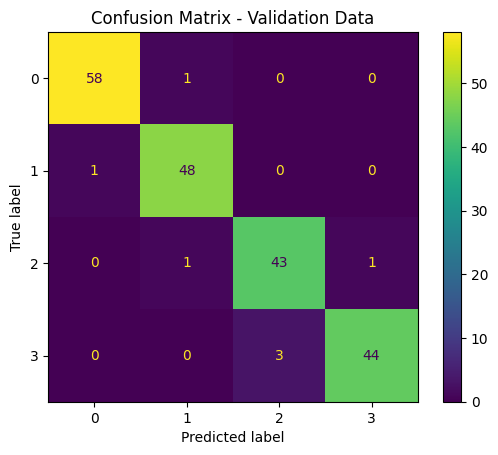


--- Test Data Predictions ---

[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 3 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 3 0 1 1 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 0 2 1 2 1 0 0 3 0 2 0 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 3 2 1 2 0 3 2 3 1 0 2 2 1 3 1 1 0 3 2 1 2 1 2 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 2 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 1 3 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 2 0 3 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 1 2 3 1 1 3 2 0 3 0 0 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 3 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 1 0 0 1
 1 0 0 0 2 2 3 2 3 0 3 0 3 0 1 1 1 2 0 3 2 3 3 1 3 1 3 1 3 2 0 1 2 1 1 0 0
 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2 0 3 2 3 0 3 0 2 3 3 3 0 2 0 2 3 0 1 1

In [82]:

# Load the saved model
loaded_model = joblib.load('SVM_model.pkl')

# Make predictions on the validation data (assuming you have y_val)
y_val_predictions = loaded_model.predict(X_val)

# Make predictions on the test data (assuming you have X_test)
y_test_predictions = loaded_model.predict(X_test)  # This will give predictions, but you need y_test to compare

# Evaluate on Validation Data
print("\n--- Validation Data Evaluation ---\n")
print("Validation Accuracy:", accuracy_score(y_val, y_val_predictions))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_predictions))
print("\nValidation Confusion Matrix:\n", confusion_matrix(y_val, y_val_predictions))

# Display the confusion matrix for validation data
ConfusionMatrixDisplay.from_predictions(y_val, y_val_predictions)
plt.title("Confusion Matrix - Validation Data")
plt.show()

# Evaluate on Test Data (without actual y_test)
print("\n--- Test Data Predictions ---\n")
print(y_test_predictions)  # This will show the predictions for the test set
